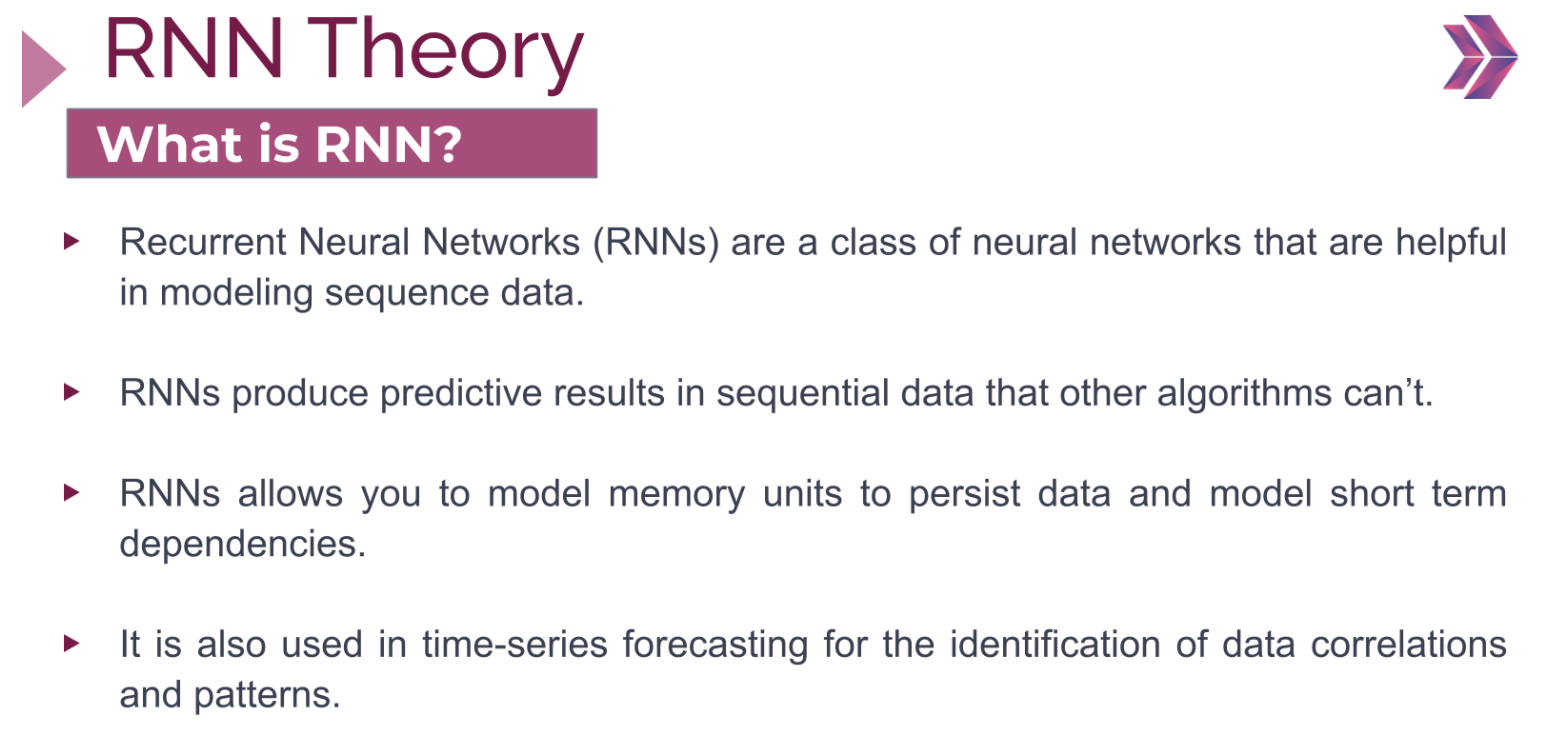

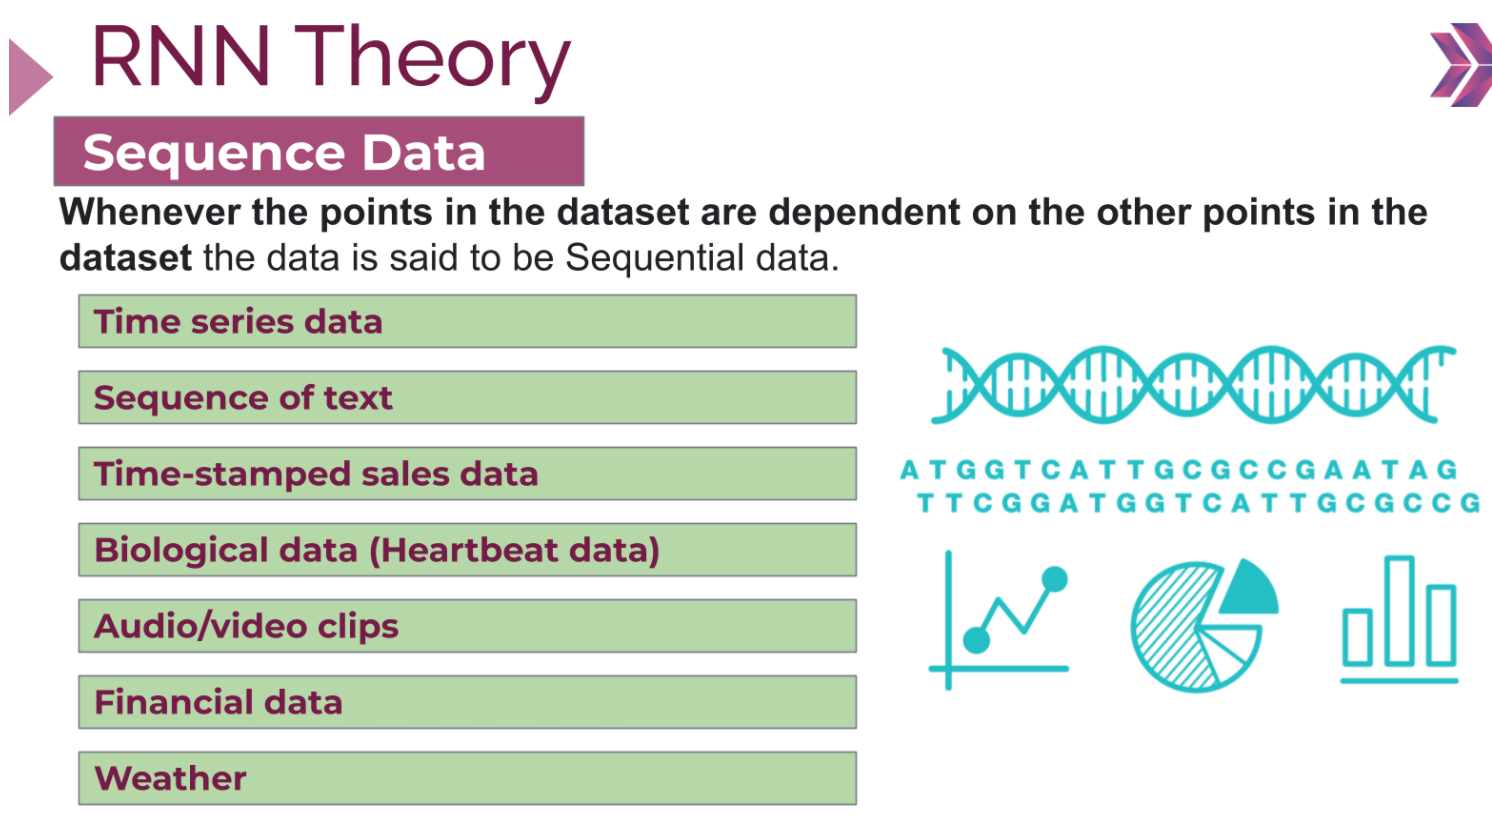

- Sequence data: Bir sonraki bir önceki ile bağlantılı olan datalardırç Daha önceki veriler bir sonraki verilere ışık tutuyor demektir. Bu yüzden hafızada tutma gerekldir.


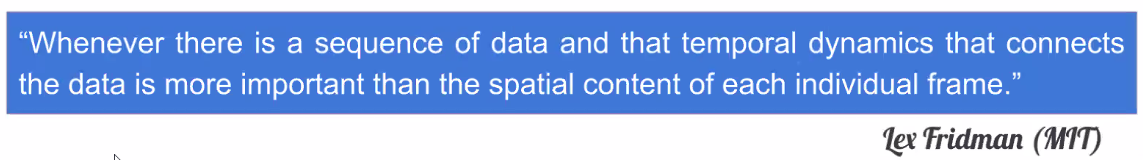

Eğer bizim datamızın yani gözlemimizin zamansal sıralaması içerikten daha önemli ise biz RNN kullanırız.

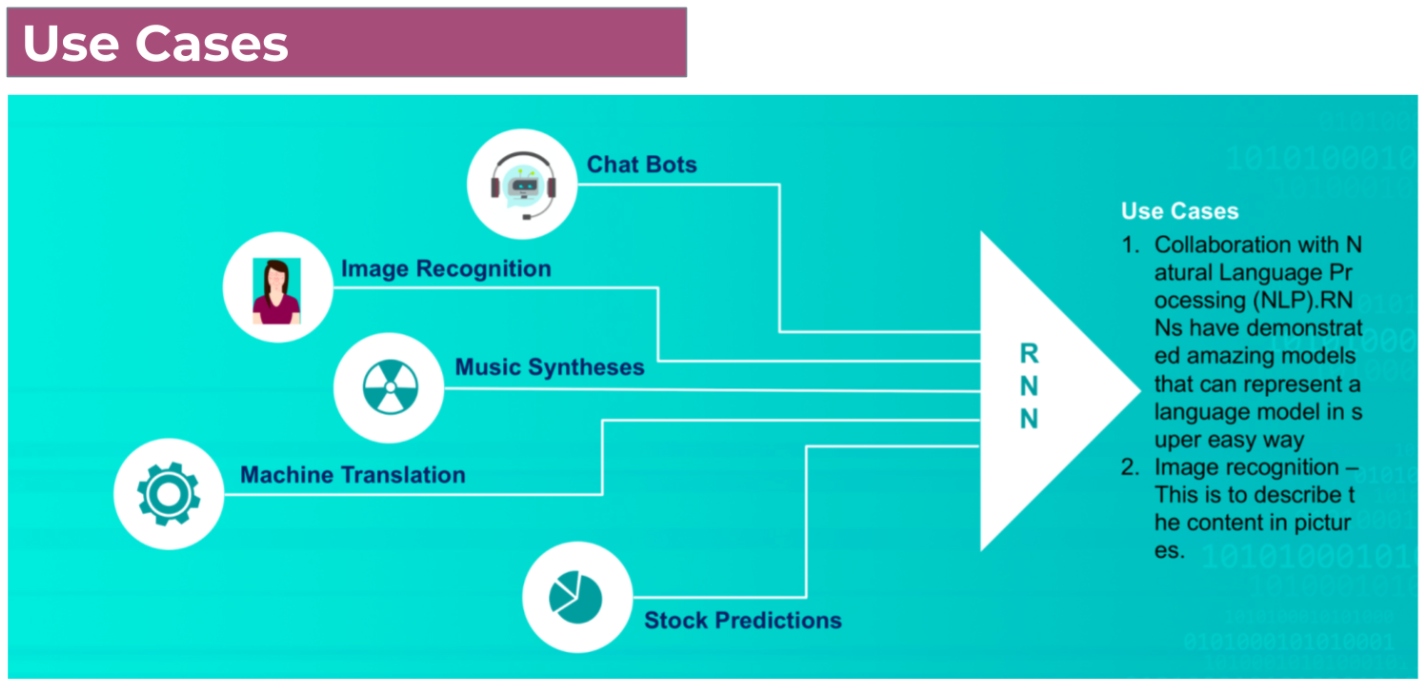

RNN nin uygulama alanları çok yaygındır. Bunların hepsinde uzman olmak imkansızdır. Örneğin, resimde en az 3 uzmanlık alanı var. Kullanım alanlarını araştır (image, speech, music ...)

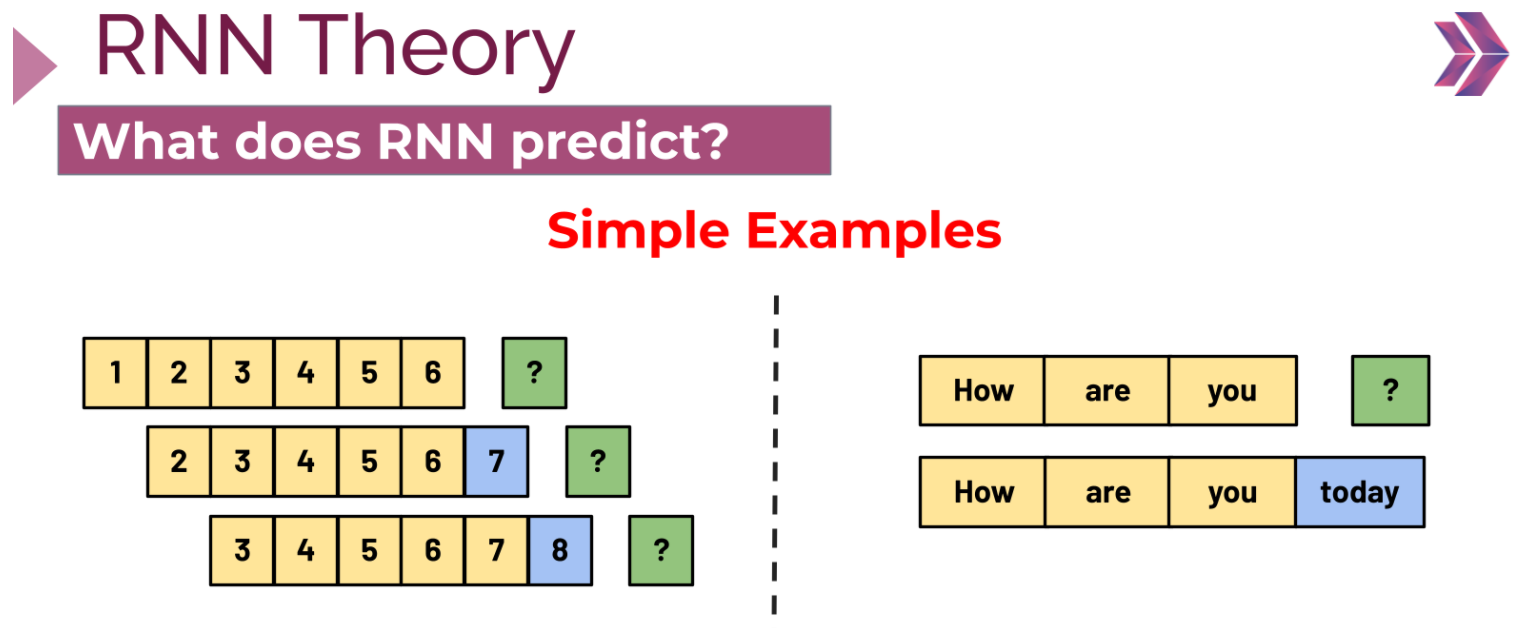

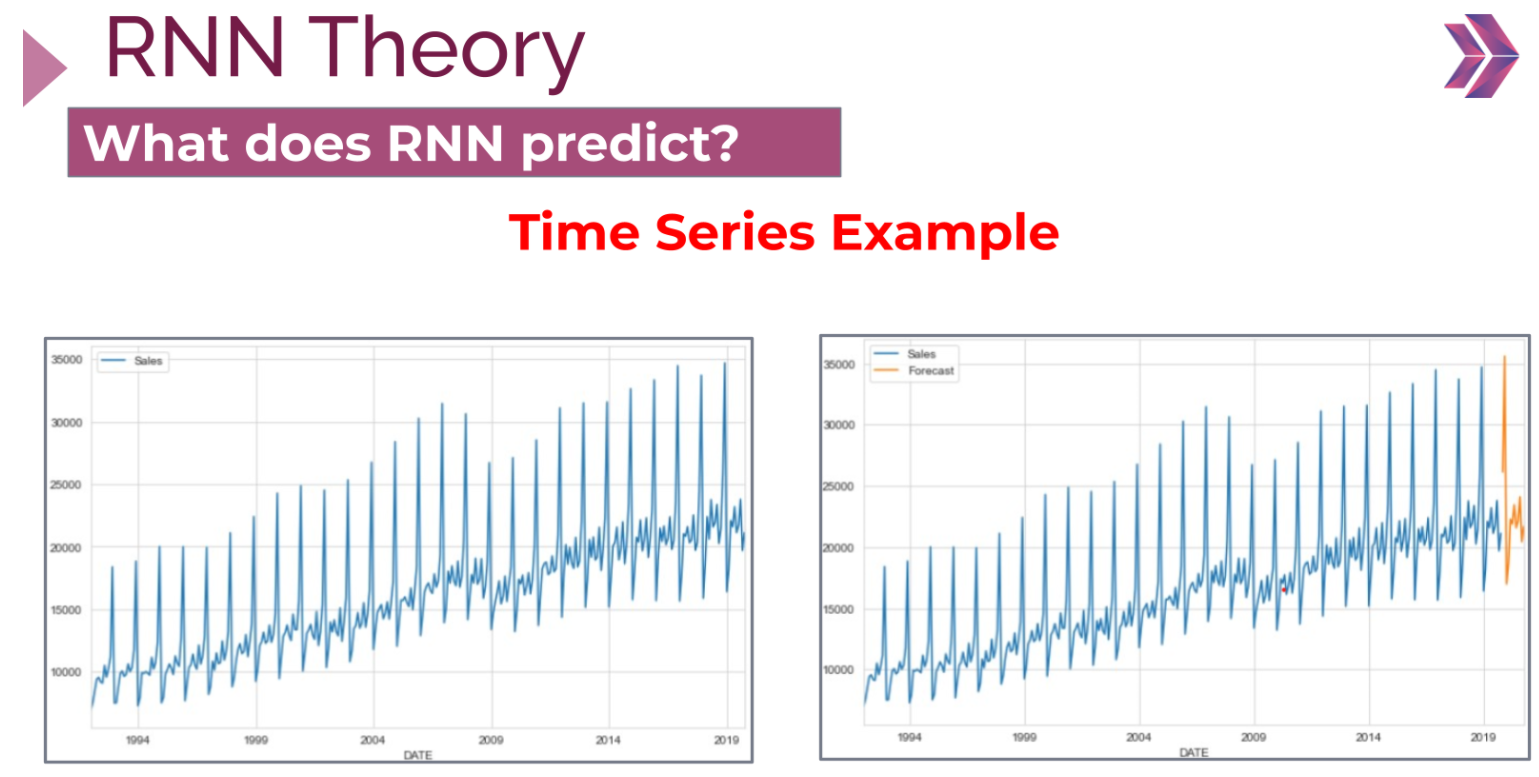

Verimizde olmayan bir bilgiyi forecast edip ileriye dönük tahminler yapacağız.<br>
sıralı faaliyetleri makinenin öğrenmesini sağlamak basitçe, böylelikle geçmişte neolduya bakıp bundan sonra ne olacağı nı tahmin ediyoruz. örnek emir 1.gün pizza 2.gün. hamburger 3. gün işskender yiyor ve bu tekrar ediyor. sen 4 . günde ne yiyeceğini tahminliyorsun, makine bu döngüyü tespit ediyor, ve 4. gün için pizza yı sana veriyor(Orion)

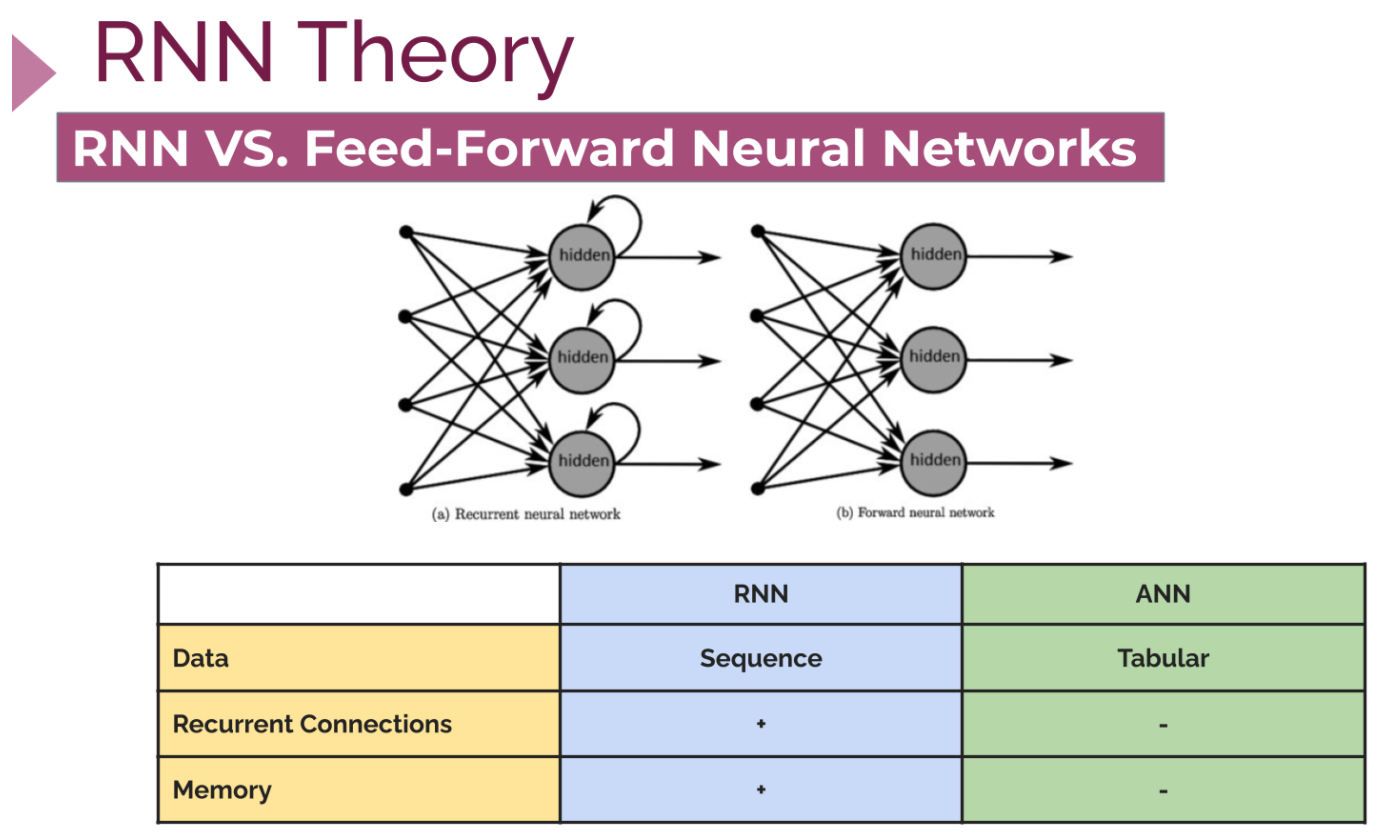

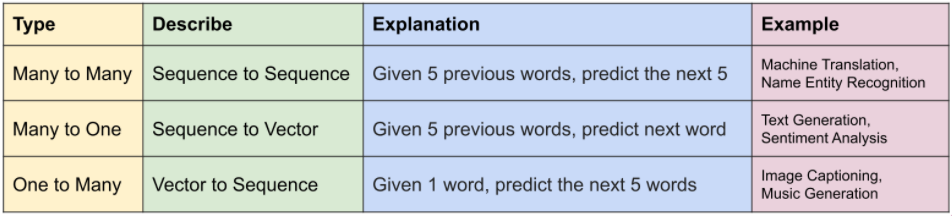

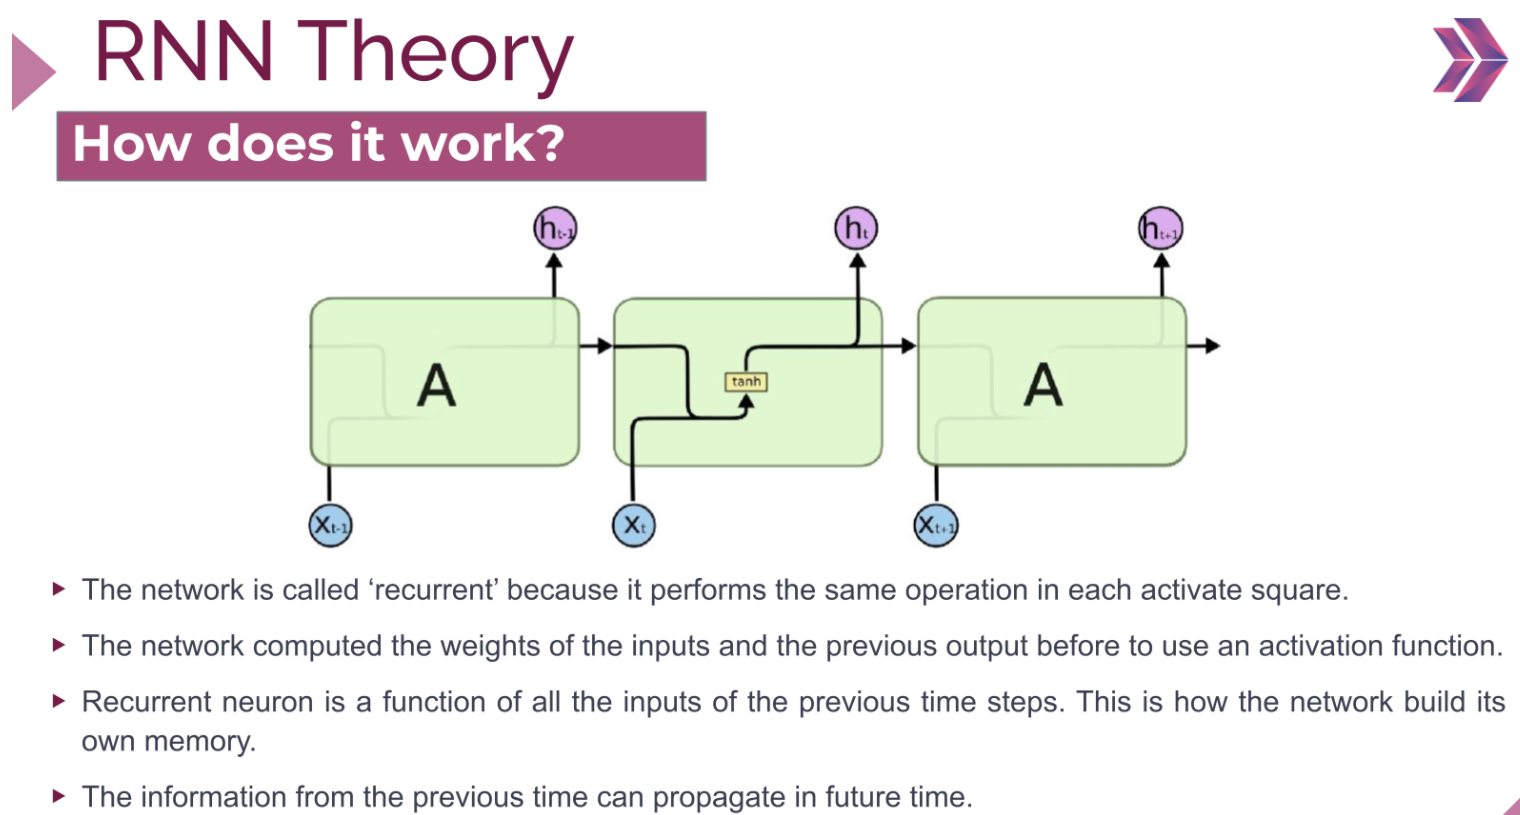

Aynı nöron zaman içerisinde üzerine yapılan girdilerle tekamül ediyor.<br>
Bir öncekinden aldığı veriyi, aktivasyon işleminden önce (bunları normal toplama işlemi gibi düşünülür, sadece başlarındaki w (ağırlık) değerleri farklı) toplar ve bunu aktivasyon işlemine sokar.<br>
Dolayısıyla hafızada tuttuğu t-1 zamanındaki bilgiyi t anı ile birleştirdi. t-1 = how, t-2 = are, t-3 = you ... gibi<br>
burada bir nöron var. aynı nöron zaman içerisinde üzerine yapılan girdilerle tekamül ediyor.<br>
birinci (t-1 zamanı) durumdan çıkan sonuca Xt den gelen veri giriyor ve bunlar toplanıp işleme giriyor ve çıktımız ht verisi oluyor. süreç bu şekilde devam ediyor.

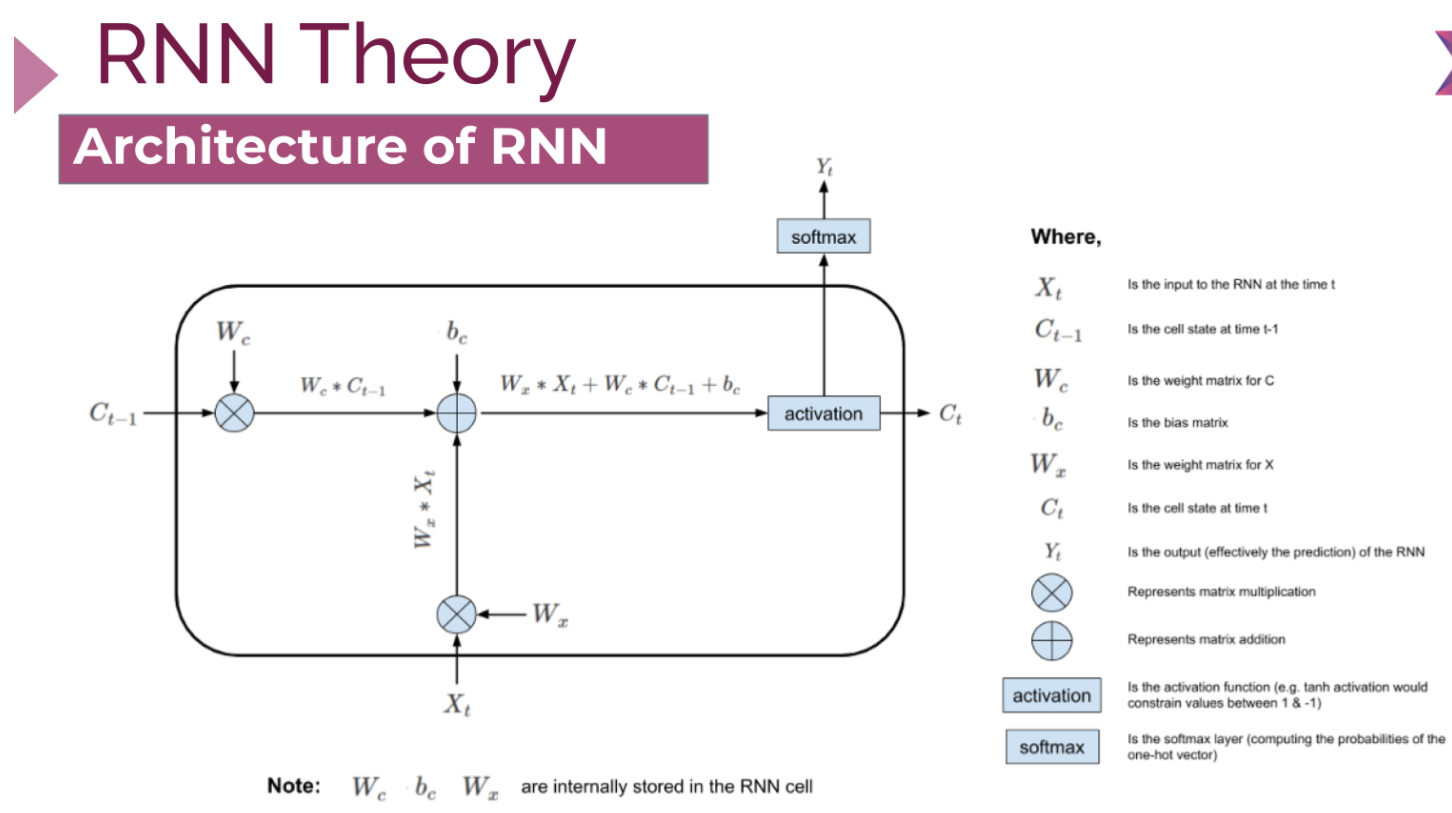

Ct-1 : bir önceki işlemlerden gelen hafıza <br>
W : burada içerde görünmüş ama normalde nörona gelmeden önceki ağırlıktır. <br>
Xt : t anındaki RNN e giren input <br>
bc : bias <br>
X ve + : bildiğimiz çarpı ve toplama işlemeri <br>

Başta dediğiniz gibi aslında çarpımlar nöron dışında oluyor. Ama görselde nörona girdikten sonra gibi görünmüş. Girdiler ağırlıklar ile çarpılır. Soldan gelen C bir önceki işlemin çıktısı, X ise t anında RNN e giren yeni girdi (input). Nöron içerisinde ise biaslar eklenerek toplama işlemi gerçekleşiyor.<br>

C t-1 : bir önceki işlemlerden gelen hafıza.<br>
Wx, Wc : inputa giren çarpan (ağırlık). bacpropagation dan, gradient descent ten gelen ağırlıklar.<br>
önceki işlemden gelen veri Wc ağırlığıyla çarpılıyor. yeni veri (Xt) Wx ağırlığıyla çarpılıyor. bunlar toplanıyor ve bc sabiti ekleniyor ve bu şekilde aktivasyon işlemine tabi tutluyor. sonuçta Yt outputu ortaya çıkıyor. eğer tekrar besleme yapılacaksa bu output Ct olarak aynı nörona geri giriyor.

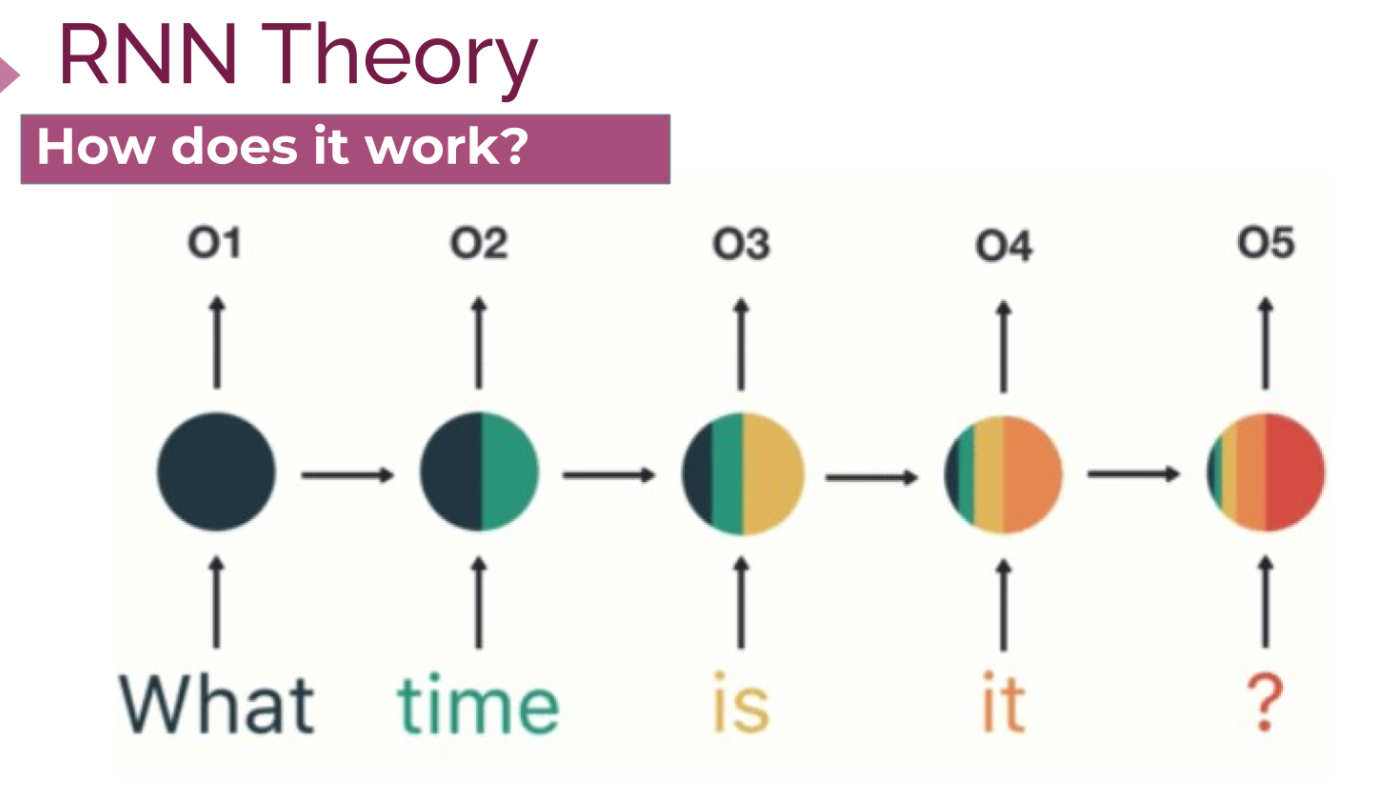

- Elimizde böyle bir zamanı soran bir sınıflandırma var. Model bunla eğitilmiş bir chatbot.
- Şimdi burada RNN Recurrent bir yapı kullanıyor.
- T=t zamanında sadece bir "what" kelimesi var.
- T=t+1 zamanında nöronun yarısında "what" var ve yarısında "time" var.
- **Yeni gelen kelimenin ağırlığı diğerine göre daha fazla**
- Bu şekilde  yukarıda göründüğü gibi her kelime ağırlığını verdi ve output layerıma bilgi gitti.
- Benim output layerımda bir classification olacak.<br>

Buradan anlaşılacak olan şey: Modelde önceki zamandan gelen kelimelerin ağırlığı azalıyor ve temsil kabiliyeti düşüyor.<br>

RNN tipi recurrent yapı örneği:<br>
nörona önce what girdisi geldi. bir sonraki zamanda (yeni) time verisi girdi ve bir önceki what ile birlikte işleme tabi oldu. sonraki zamanda is girdi. yeni verinin ağırlığı diğerlerinden daha fazla. Önceki giren verilerin ağırlığı zaman içinde daha da azalıyor. ilk girenin ağırlığı en az oluyor. sonuçta tüm bu önceki girdilerin sonucunda 05. zamanda bize bir tahminde bulunuyor.

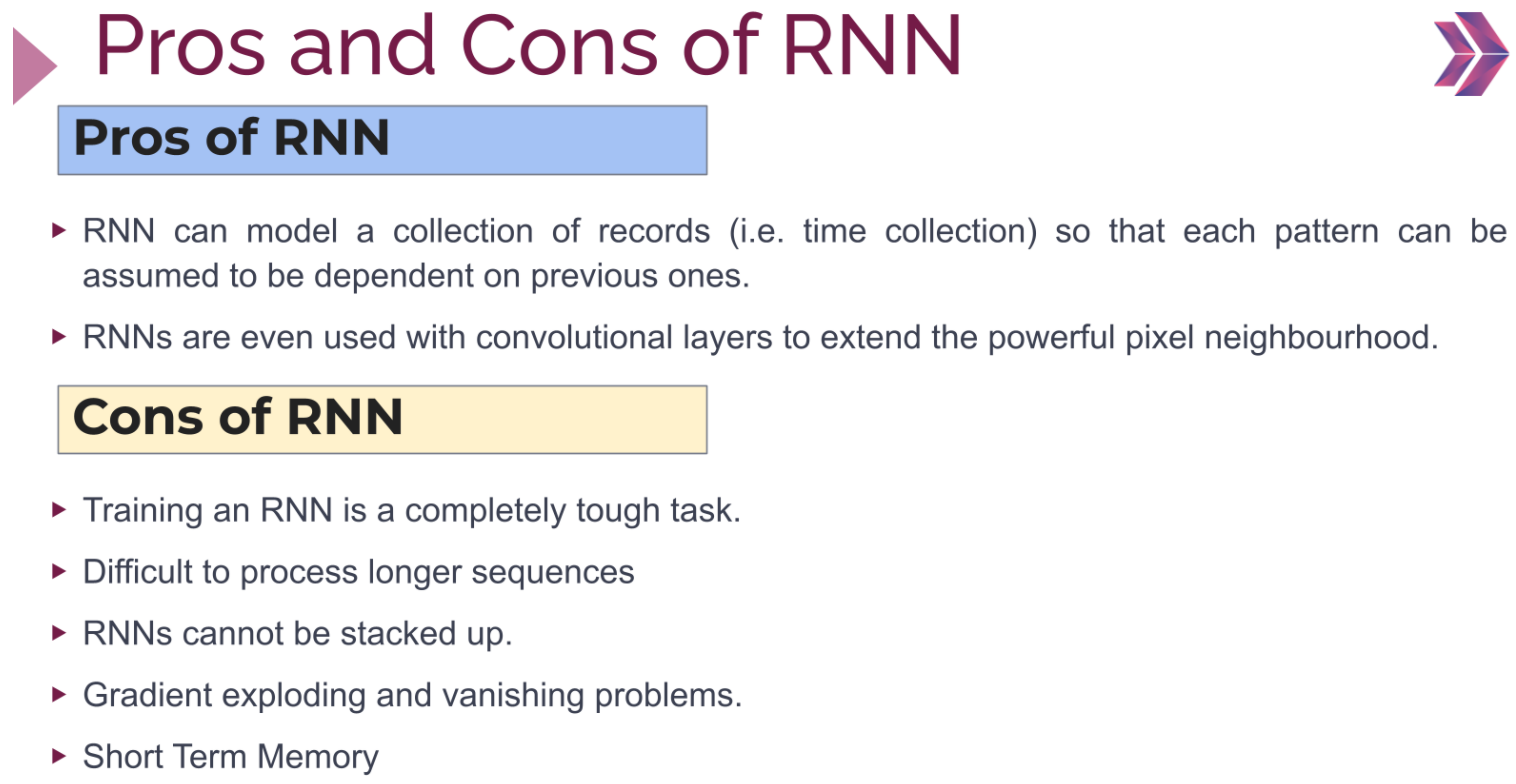

- klasik waterflow işleyiş gibi, biri bitmeden diğerine geçemiyor demekki. Oku geç...

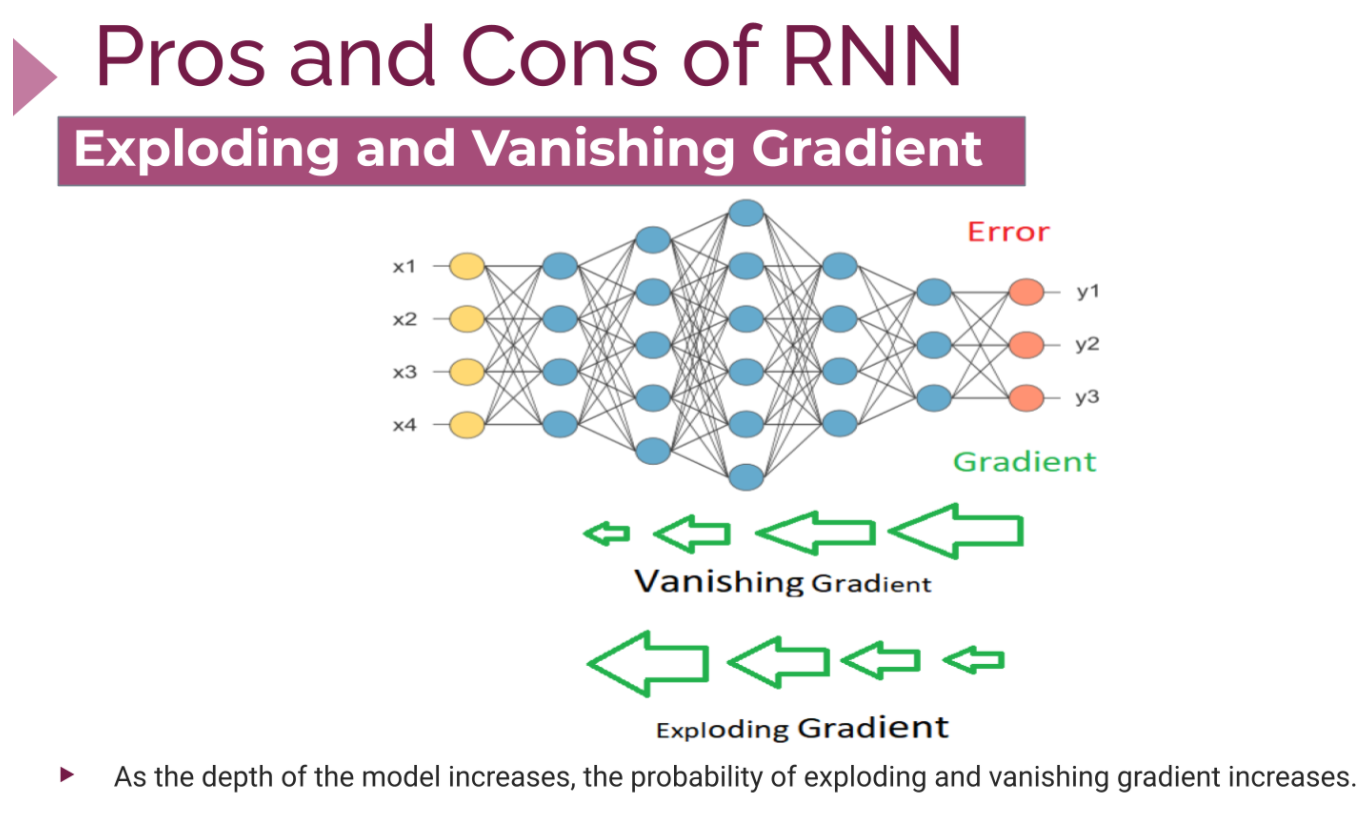

 - Modelimizin öğrenmesini engelleyen bir durum vanishing gradient.
 - geriye doğru gittikçe doğal olarak eğim (etki) düşüyor. 
 - hidden layer fazla ise ve ya activation function tan ise mesela, çğrenme azalıyor, en çok da diklik arttıkça meydana gelir.
 - tek bir hidden layer varsa mesela tanh sıkıntı vermeyebilir ama layer sayıları (model uzunluğu) arttıkca relu yani rectified aktivasyon kullanılır.
 
 Backprogation ile en sondan başa doğru ağırlıklara düzeltme uygulayarak öğrenmeye katkı sağlanıyordu. türev alma işlemleri ile hata değerlerine göre ağırlıklar değiştiriliyordu. deep layer ne kadar derinleşirse hidden layer ne kadar artarsa gradient değeri kademe kademe azalıyor. geri dönüşte her layerde daha az gradient değeri ile ağırlıklar çarpılıyor. dolayısıyla git gide sönümlenme oluyor.
Buna Vanishing Gradient (vanish: sönümlenmek.. Gradient eğim demek, dikliğin eğimi demek, yani türevle alakalı..)  Erorların azalışındaki eğim, yani hatanın azalmasındaki değişim gradient değerini oluşturuyordu. ve o oranda da geriye dönük düzeltme uygulanıyordu. Geriye dönük düzeltme uygulanırken her layer da bu gradient değeri biraz daha azalarak uygulanıyordu. Bu değer azala azala Vanishing Gradient durumu oluşuyor. Takdir edersiniz ki layer sayısı arttıkça bu sönümlenme durumu daha fazla karşımıza çıkacaktır.

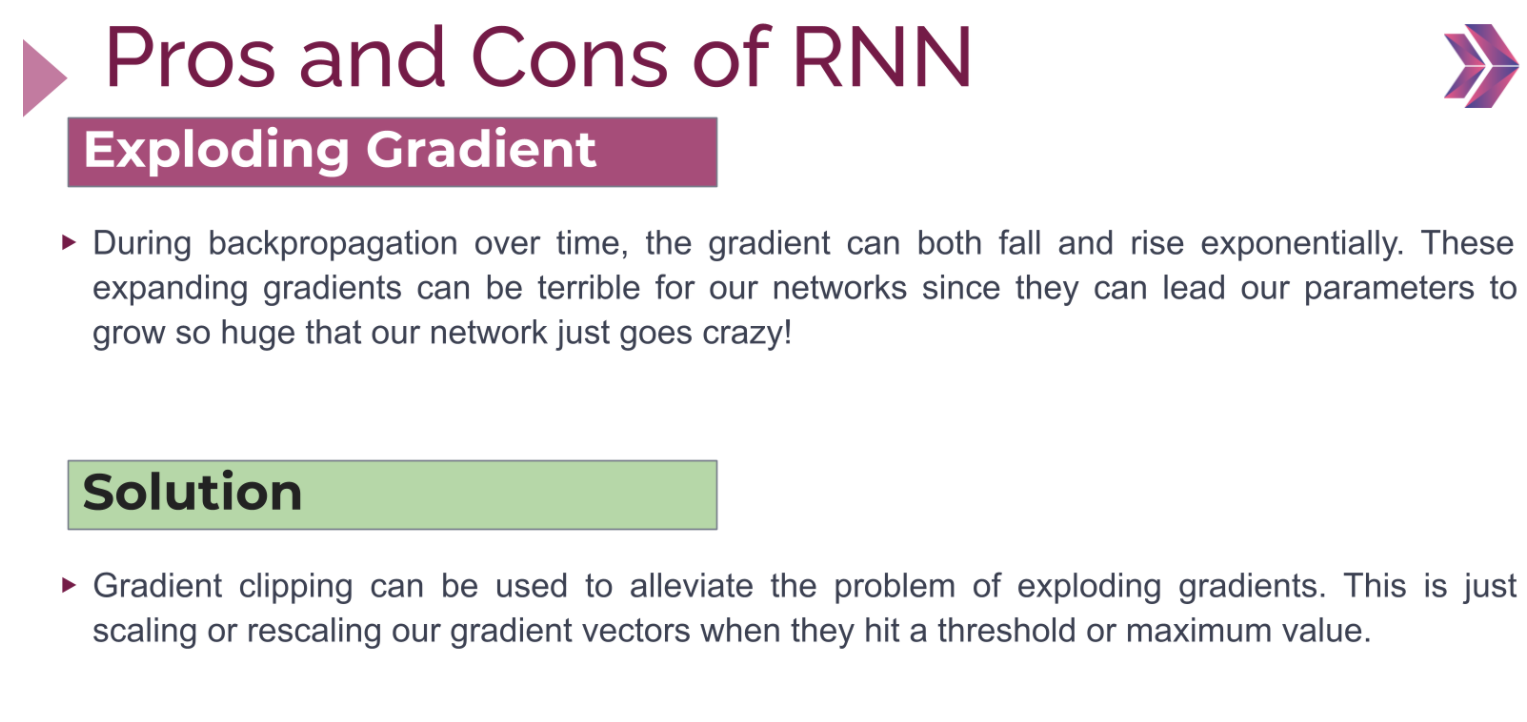

- Bunların çözümleri zaten bulunmıuş ama modelin bir problemi olduğunda bunların farkında olup, activ. func. değiştirilebilir, layer sayısı azaltılabilir vesaire vesaire.

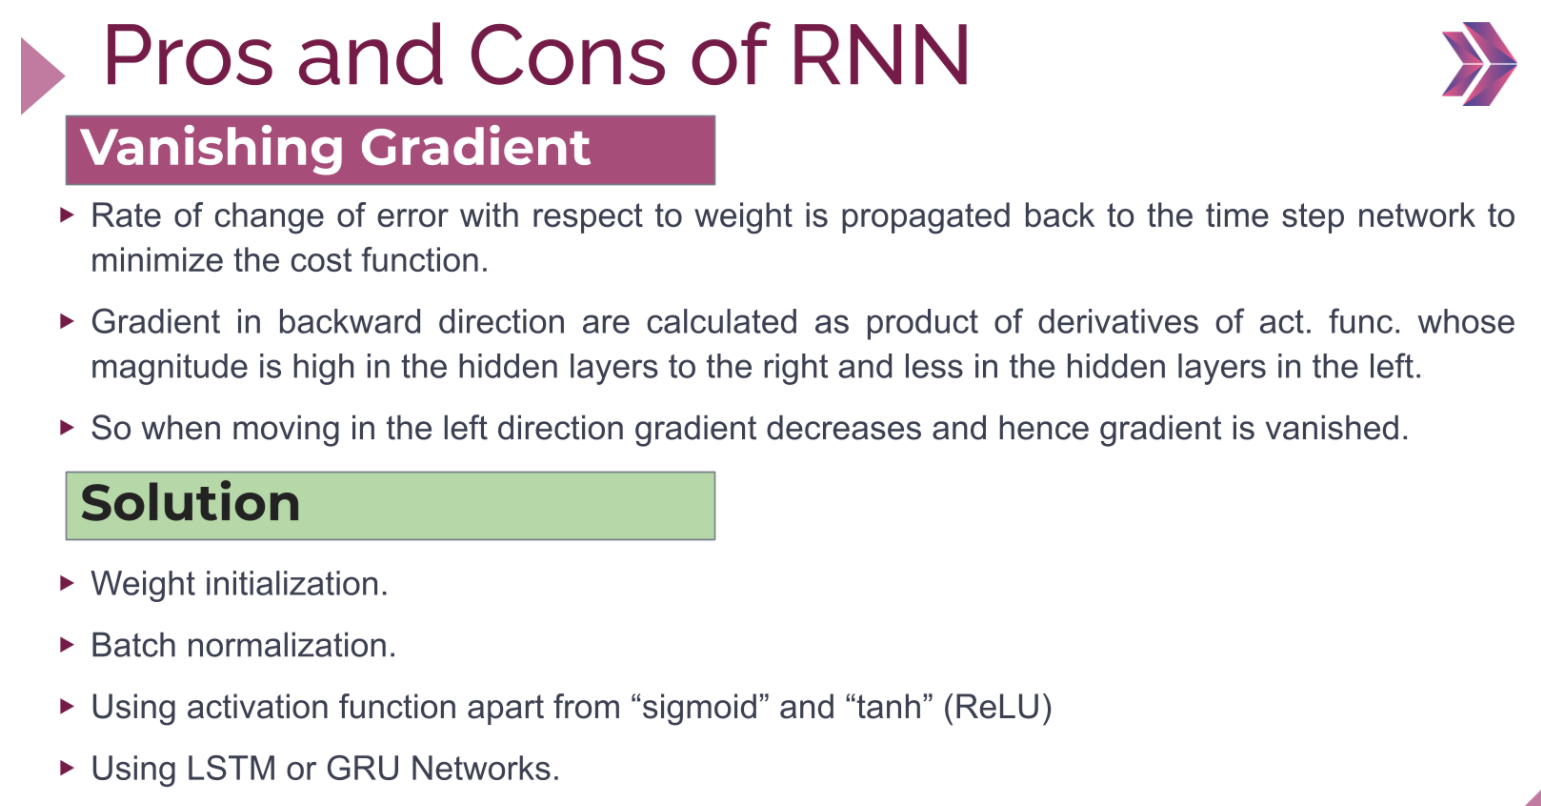

- RNN ve LSTM arasında 15 yıl var. Zamanında kullanılmış ama artık güncel olarak kullanımıyor.
- Günümüzde bu sorun Relu, LeakyRelu, Google ın çıkardığı yeni act. func. (sıvış) kullanılarak çözüm sağlanır.
- Swish Activation Function by Google
- https://medium.com/@neuralnets/swish-activation-function-by-google-53e1ea86f820

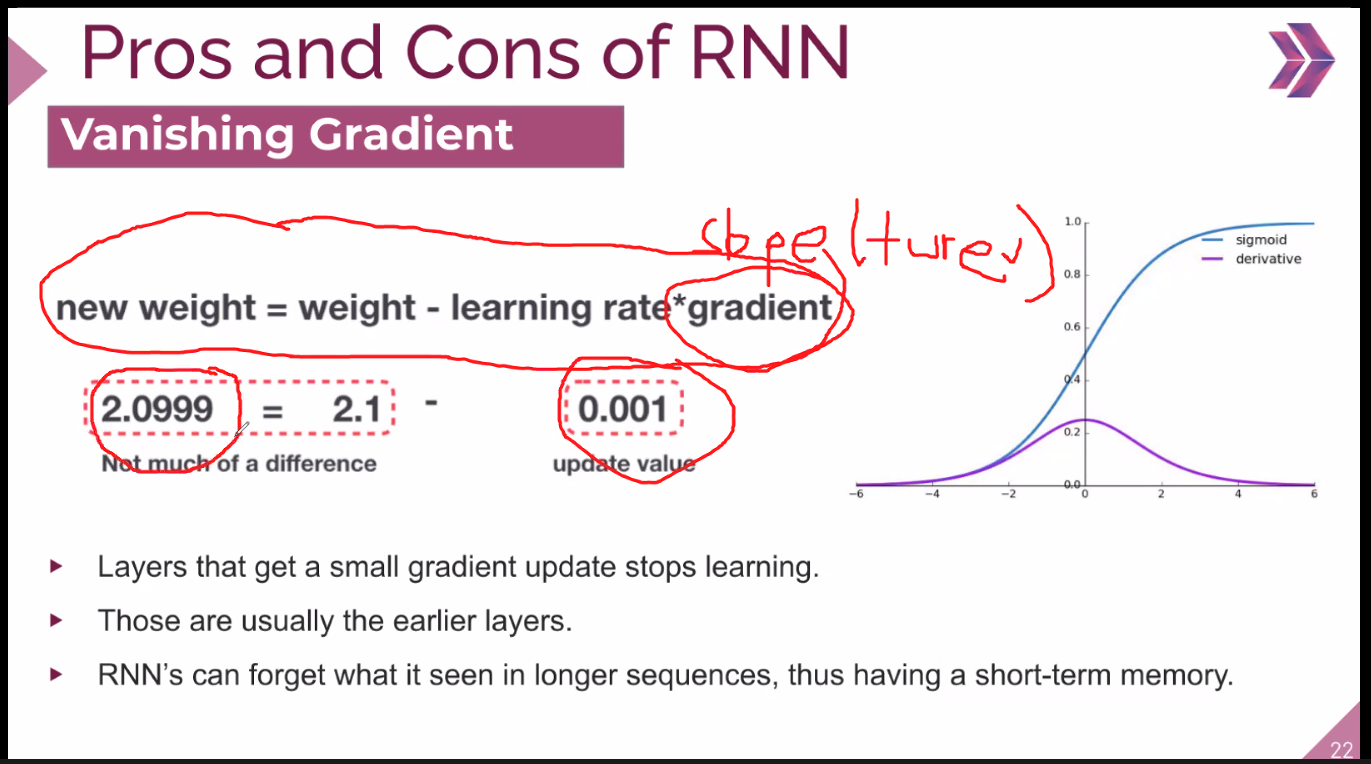

- Öğrenmeme artık çok büyük bir katkısı olmuyorsa (katsayı düşüp) gradient düşüyorsa vanishing gradient oluyor.
- Modelimiz sondan başa gittikçe gradient seviyemiz düştüğünde (yani türev düştüğünde, eğim düştüğünde) öğrenmemiz de yavaşlayacak. sıfıra çok yakın değerlere ulaştığında model öğrenme durdu olarak kabul edecek.
- Yeni aktivasyon fonksiyonları gradient düşüşün sönümlenmesine engel oluyor.

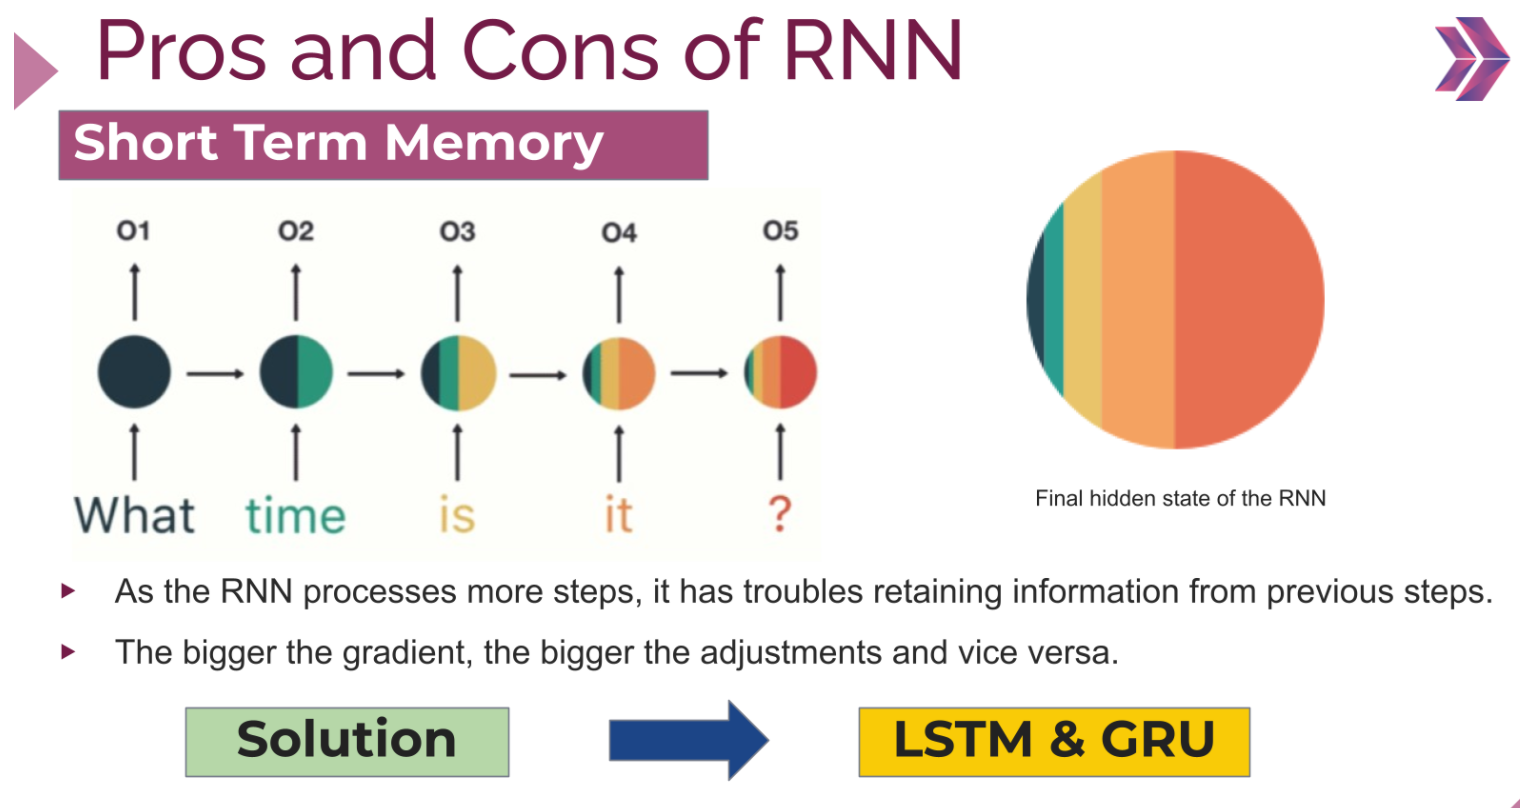

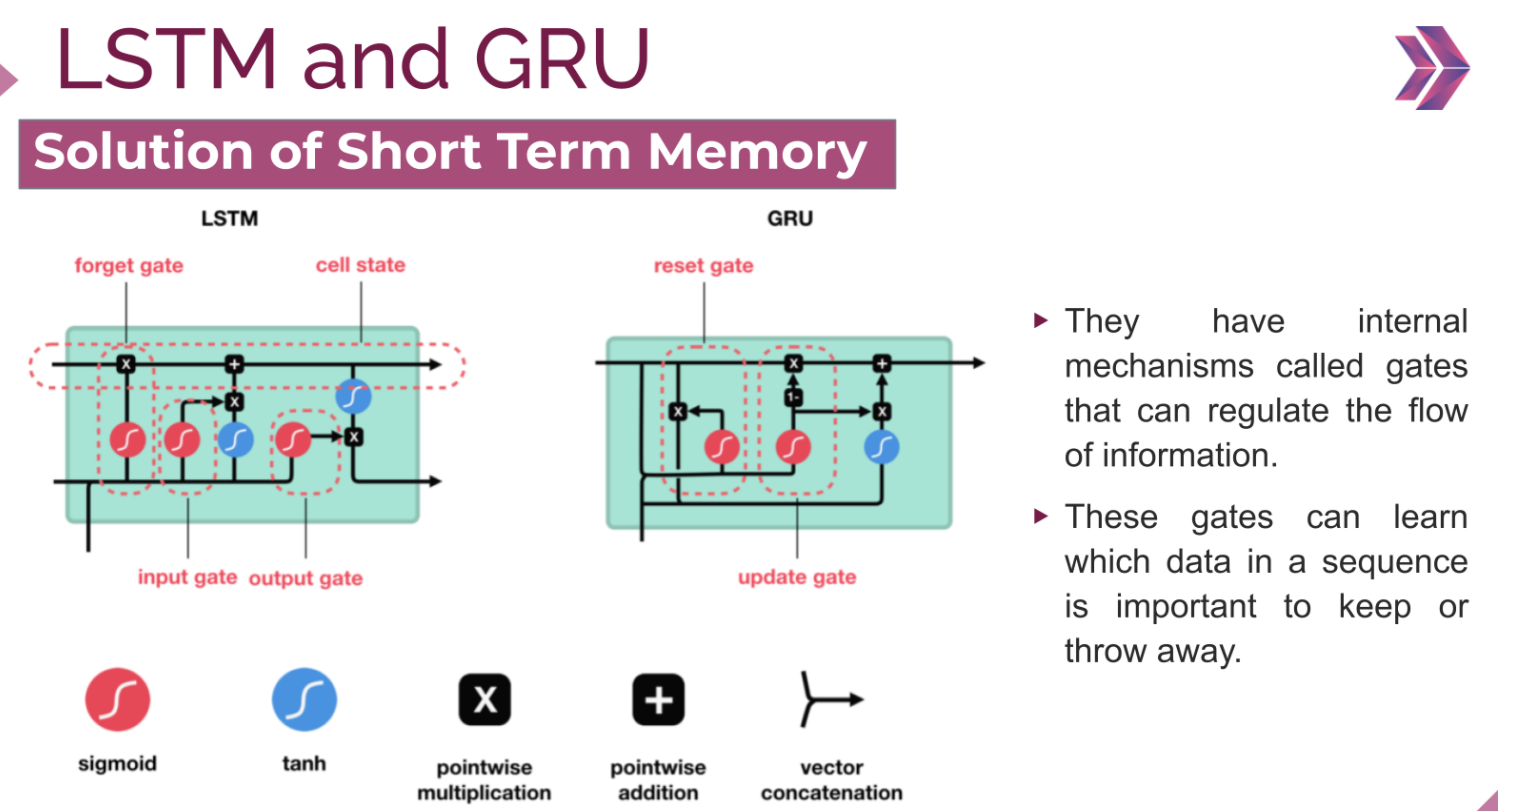

- Karmaşık bir yapı oluşturulmuş.
- Ama genel anlamda:<br>
Yan tarafta yazılan gibi, kırmızılar kapı görevi gören aktivasyon fonksiyonlarıdır. Amacı ise önceki verilerden hangisi önemli hangisi değil, onu tutayım gibidir. Çünkü model uzadıkça baştaki girdilerden hangisi önemli onu akılda tutması gerekir.
- LSTM ve GRU önemli görülen kelimeleri tutar.

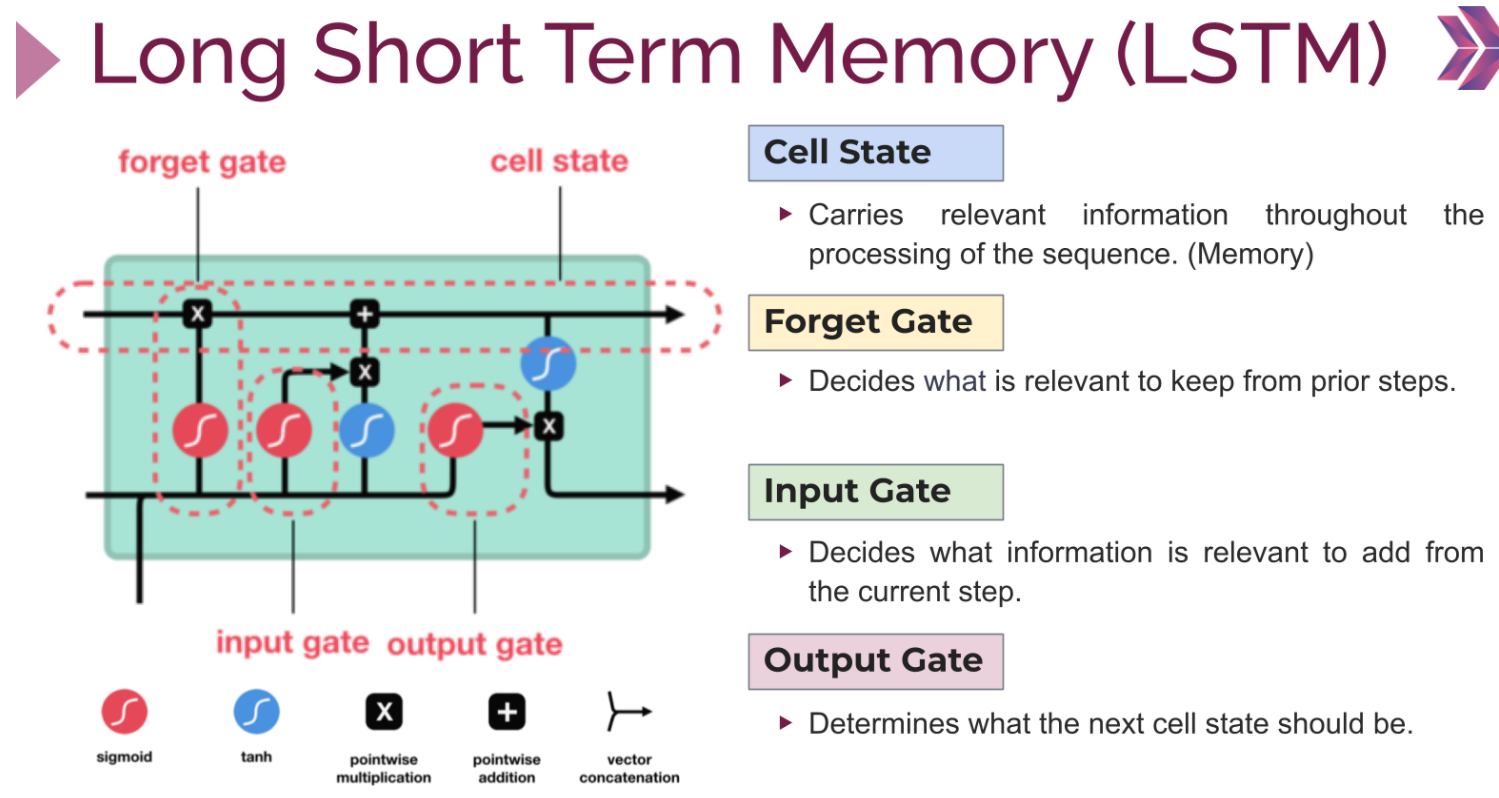

- Cell State: Güncel hafızyı tutar. (yukardaki ok) aynı nörona geri beseleme için geri dönen veri.
- Forget gate: önceki verilerden neyin önemli neyin önemsiz olduğunu gösteriyor. Çıkış 1 e ne kadar yakınsa o veri o kadar iyi tutulur. (aşağıdaki ok) burada cell state teki aynı nörona geri giren veri aynı zamanda sigmoid fonksiyona tabi tutularak sonraki nörona giriyor. (gelen verileri sigmoid fonk. sokuyor. 1 e ne kadar yakınsa o veriler o kadar tutuluyor. 0 a ne kadar yakına o veri o kadar unutulması gerekiyor demek.) 
- Input gate: Nörona yeni gelen verinin ne kadarını hali hazırdaki duruma ekleyeyim.
- Output gate: Bir sonraki step (adım) a neyi ne kadar göndereyim.<br>
- **Hocam leaky relu öğrenime hiçbirşey katmaz sadece dead neuron sorununa çözüm sağlar. Relu'ya kıyasla öğrenmeye birşey katmaz anlamında tabiki tanh'a göre leaky relu aynı relu gibi öğrenmeye hızlandırır.**<br>


- Forget Gate:<br>
https://miro.medium.com/max/700/1*GjehOa513_BgpDDP6Vkw2Q.gif
- Input gate:<br>
https://miro.medium.com/max/700/1*TTmYy7Sy8uUXxUXfzmoKbA.gif
- Cell State:<br>
https://miro.medium.com/max/700/1*S0rXIeO_VoUVOyrYHckUWg.gif
- Output Gate:<br>
https://miro.medium.com/max/700/1*VOXRGhOShoWWks6ouoDN3Q.gif

- arkadaşlar arabayı kullanmak için makine mühendisi olmanıza gerek yok. anahtarı tak çalıştır motor çalışıyor tekere güç iletiliyor. bir uyguluyacı olarak bu seviye bize yeter.(orion)
- makine de bile forget function olduktan sonra benlik sorun yok. temel esasları alır diğer konuları konunun sahibine bırkmak lazım , alogrith developer olmayacağız donuçta(öyle bişey var mı , hç haberim yok)(C8286 Steve)

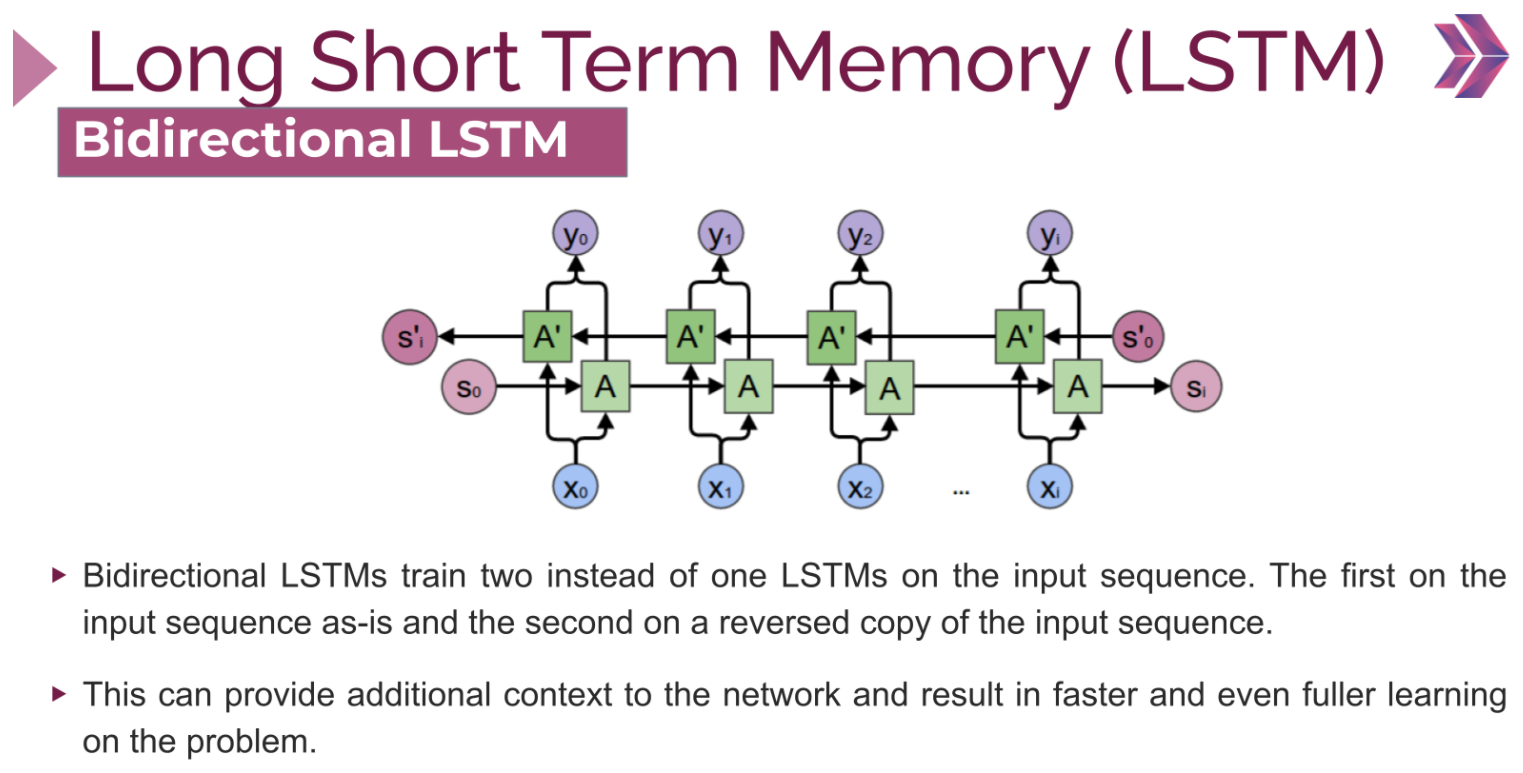

- Aynı mantık sadece tersten input gibi.
- what time is it      ----- it is time what

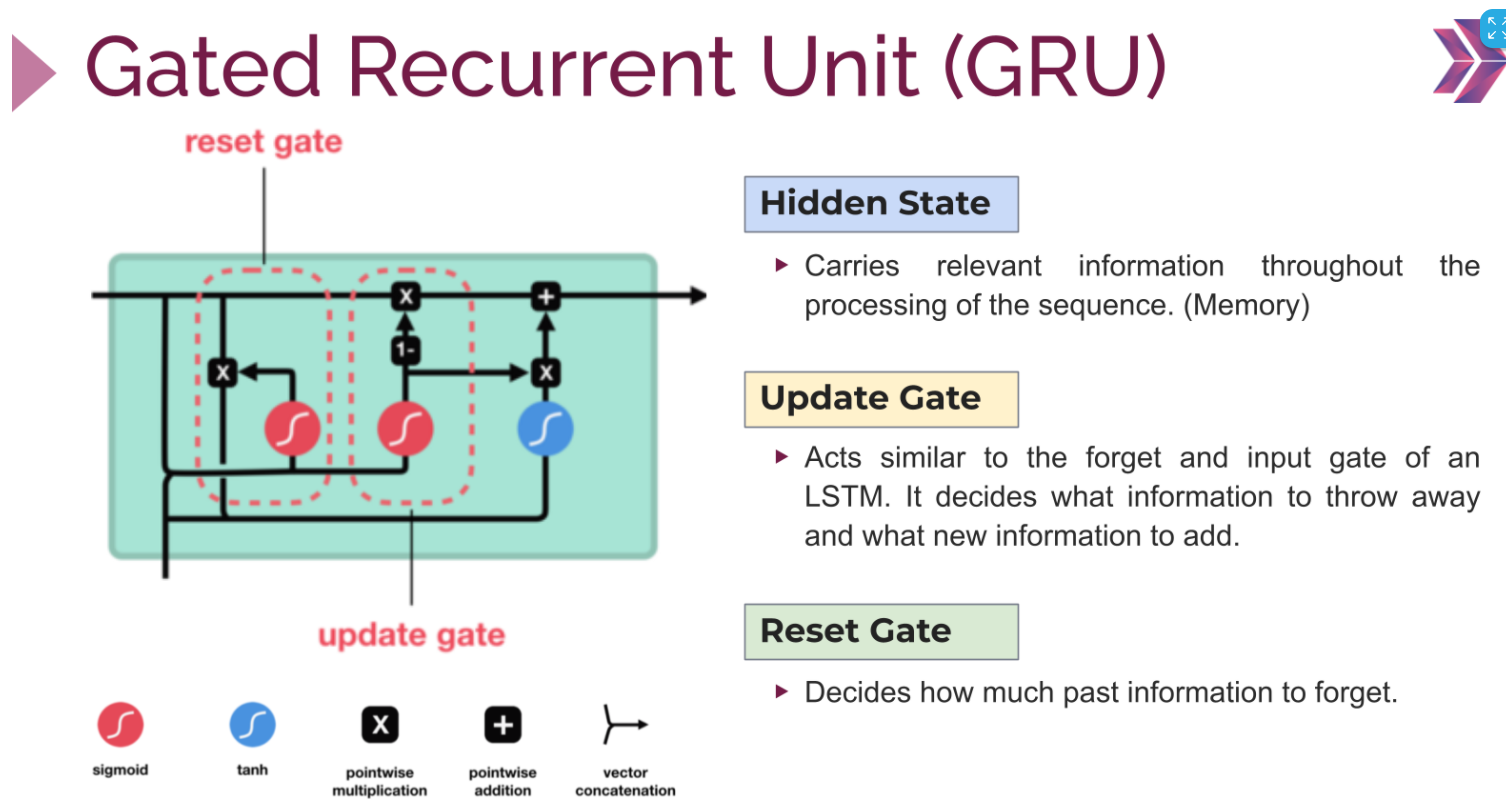

- update gate: Forget gate ve input gate in karışımı gibi neyi unutup neyi tutacağım.
- reset gate: ne kadarını aklımda tutacağımı ayarlar.
- lstm i kısaltmış. 2 gate e düşürmüş. İşlemi hızlandırmış.

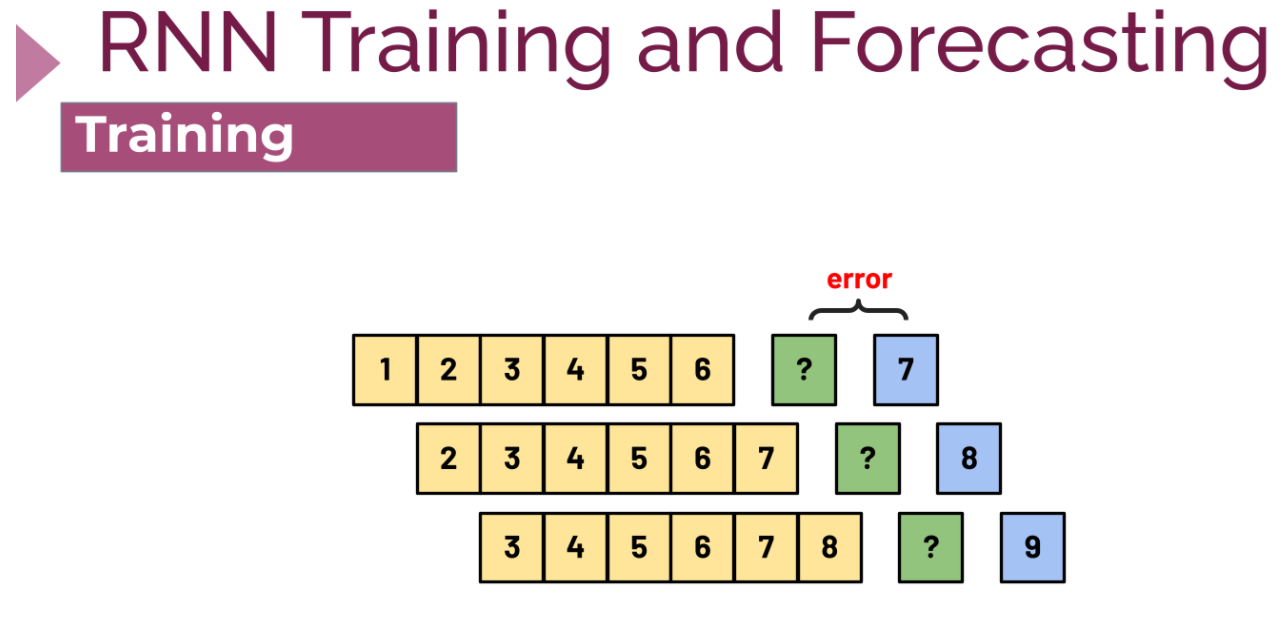

- 6 ya kadar olanı alacak ve bir tahmin yapacak. 7 ile 6ya kadar olan tahmini karşılaştıracak, örneğin 6.9 ve 7. Yani aradaki fark 0.1.
- Bu hatayı aldı ve 7 ye kadar olanı aldı ve ağırlıkları güncelleyerek bu sefer 7 ile 8 arasındaki farkı 0.05 hata ile tahmin etti. vesaire ...
- Hata oranı düşüyor ve model iyileşiyor.

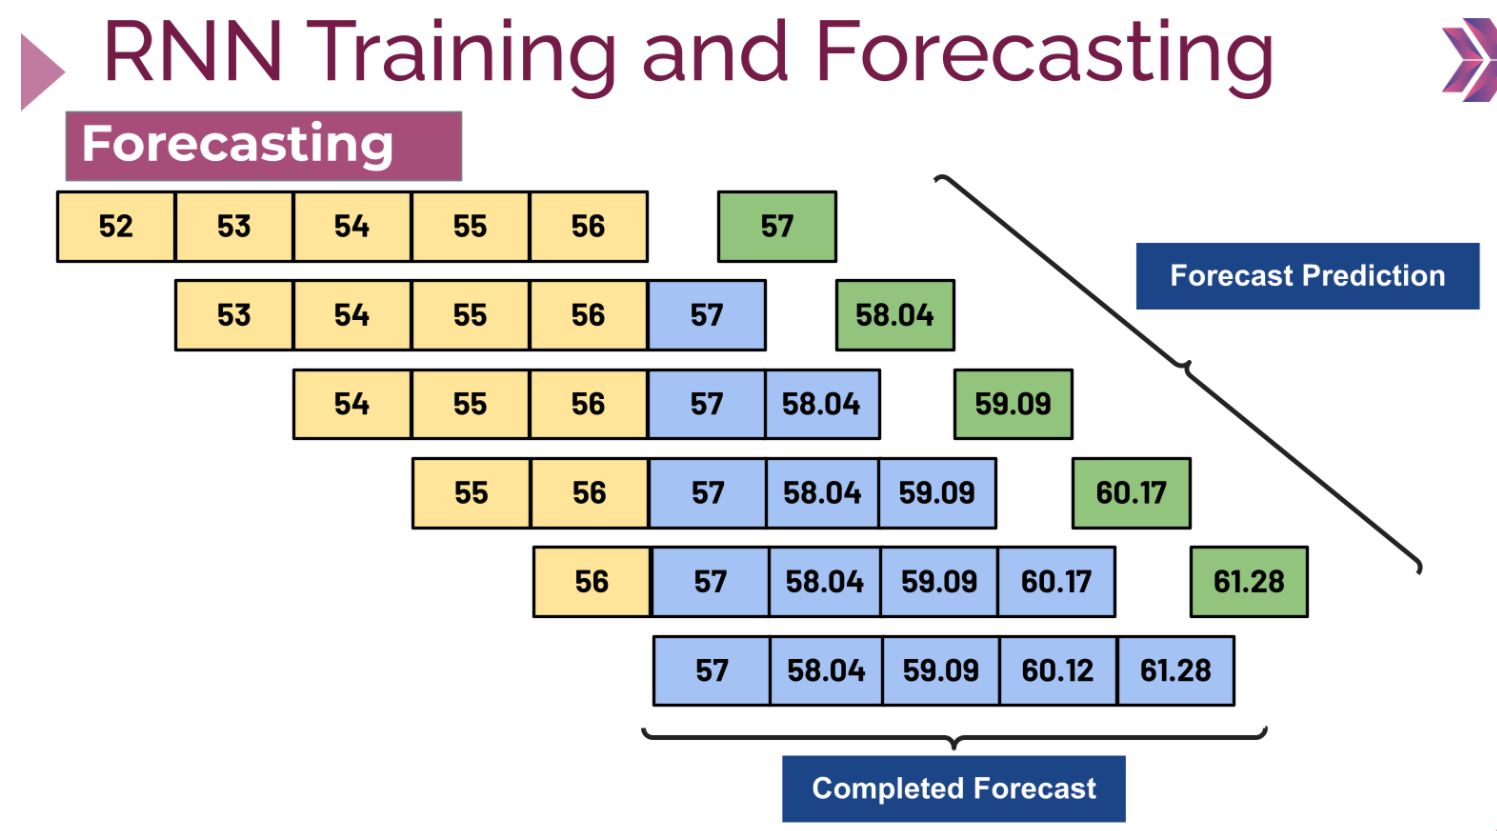

- **yeni veri olmaksızın, hataların en aza indirgenmiş haliyle tahminini yapacak. (C8406 Hüseyin)**
- Bir sonraki tahminde, bir önceki hata oranı ile yapılan tahminden beselendiği için artık her defasında hata biraz daha artacaktır.
- yeni veriyi önceki girdilerden tahmin ediyor ve güncelliyor / önceki tahminlerinden istifadeyle yeni tahminler yapıyor hocam aynen dediğiniz gibi (Matt instructor)
- kısa süreli tahminler daha tutarlı sonuçlar veriyor diyebiliriz (Matt instructor)

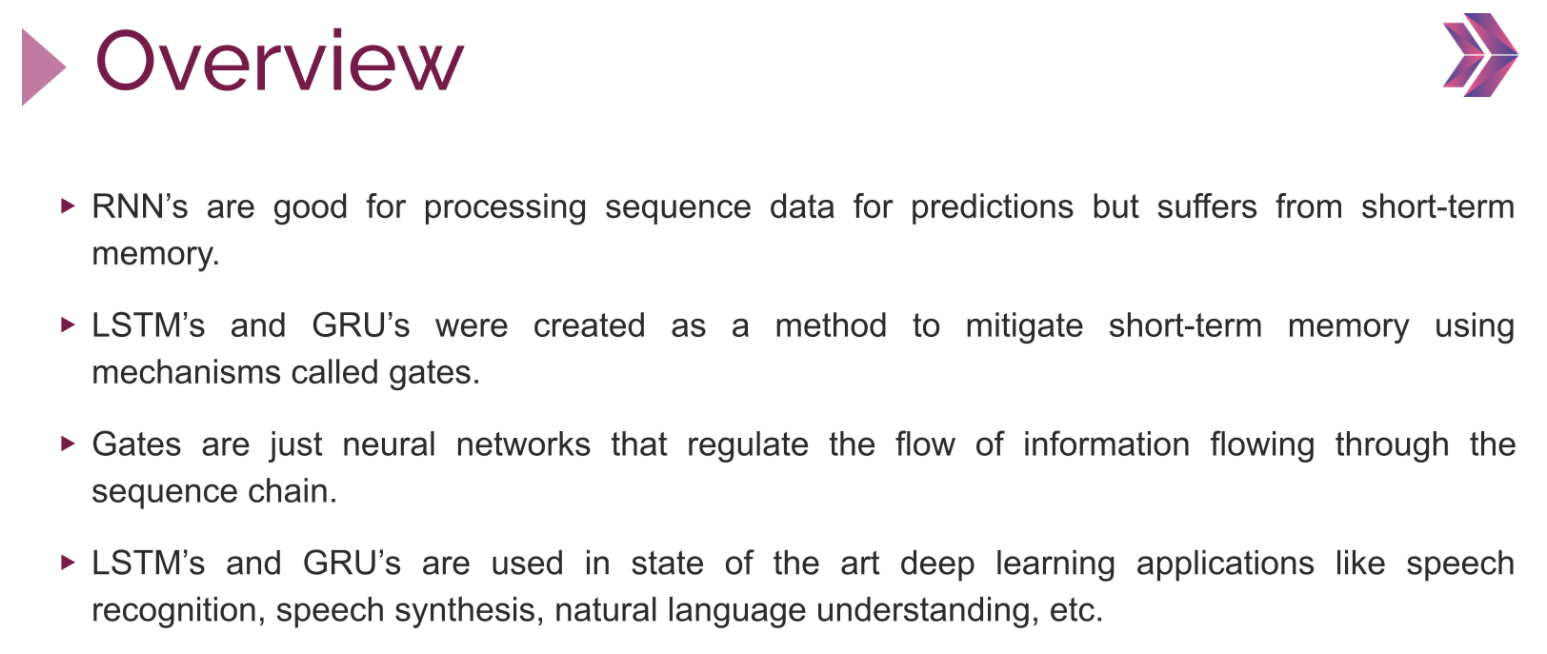